In [1]:
from storms import geomagnetic_storm_data
# from dscovr import open_dscovr
import matplotlib.pyplot as plt
import pandas as pd
# from ace import open_ace

In [31]:
may10_df, may10_shock = geomagnetic_storm_data('2024-05-10', 'both', before_shock=6, shock_thresholds=(5, 50))
oct10_df, oct10_shock = geomagnetic_storm_data('2024-10-10', 'both', before_shock=6, shock_thresholds=(5, 50))

/Users/jimtang/Dev/historical-solar-wind/storms.py:64: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["Rate_of_Change"] = df[column].pct_change() * 100  # Convert to percentage


In [32]:
may10_shock, oct10_shock

(Timestamp('2024-05-10 16:35:00'), Timestamp('2024-10-10 14:47:00'))

In [33]:
may10_tindex = (may10_df.index - may10_shock).total_seconds() / 3600
oct10_tindex = (oct10_df.index - oct10_shock).total_seconds() / 3600

Text(17.5, -72, 'By Jim Tang (@wxmann)')

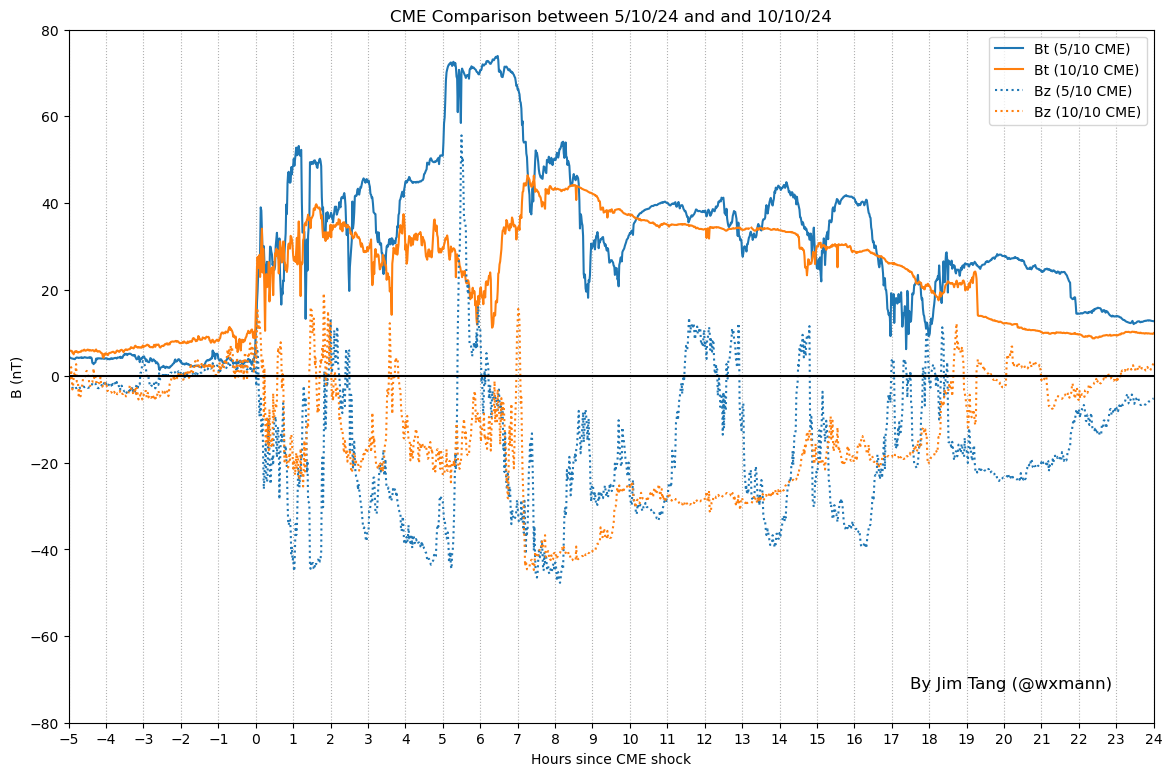

In [66]:
fig = plt.figure(figsize=(14, 9))
plt.plot(may10_tindex, may10_df.bt, label='Bt (5/10 CME)')
plt.plot(oct10_tindex, oct10_df.bt, label='Bt (10/10 CME)')
plt.plot(may10_tindex, may10_df.bz, 'C0:', label='Bz (5/10 CME)')
plt.plot(oct10_tindex, oct10_df.bz, 'C1:', label='Bz (10/10 CME)')
# plt.plot(may10_tindex, may10_df.by, 'C0--', label='By (5/10 CME)')
# plt.plot(oct10_tindex, oct10_df.by, 'C1--', label='By (5/10 CME)')
plt.axhline(y=0, c='k')
# plt.axvline(x=0, c='k', ls='--')
plt.xticks(range(-6, 25, 1))
plt.grid(axis='x', ls=':')
plt.ylim([-80, 80])
plt.xlim([-5, 24])
plt.xlabel('Hours since CME shock')
plt.ylabel('B (nT)')
plt.legend()
plt.title('CME Comparison between 5/10/24 and and 10/10/24')
plt.text(17.5, -72, 'By Jim Tang (@wxmann)', fontdict=dict(fontsize=12))

Text(0, 0.5, 'Speed (km/s)')

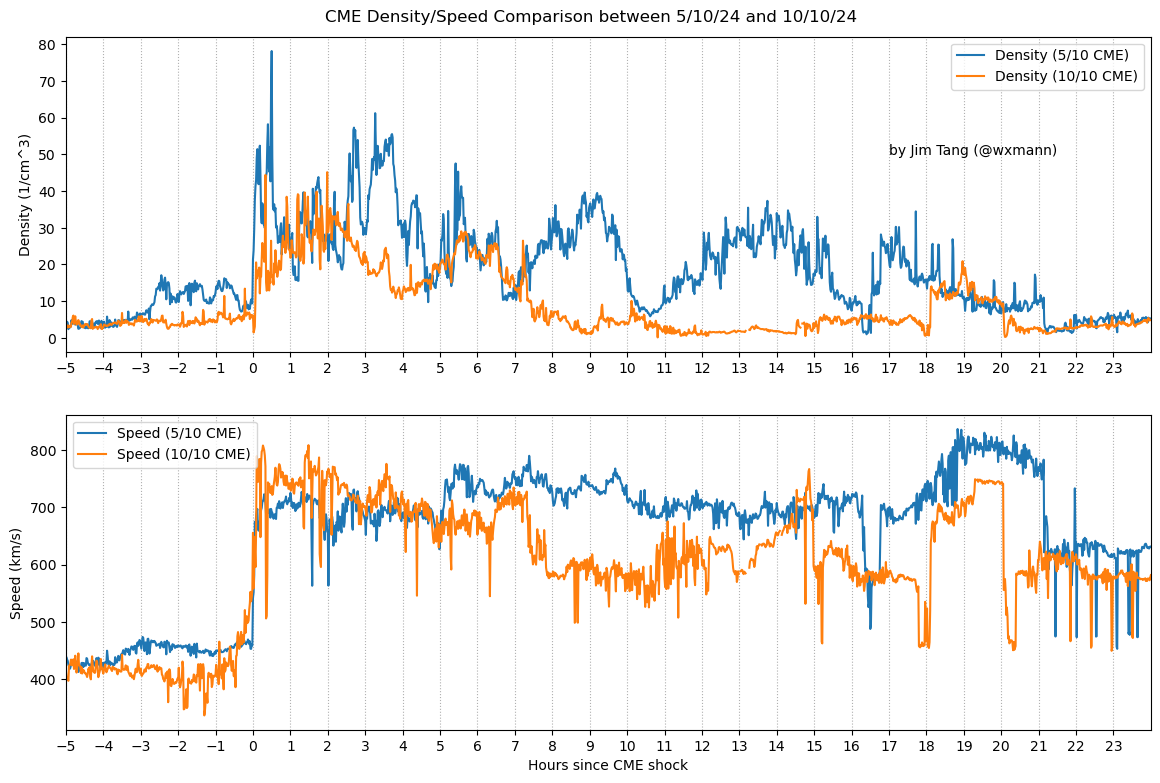

In [98]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 9))
ax1.plot(may10_tindex, may10_df.density, label='Density (5/10 CME)')
ax1.plot(oct10_tindex, oct10_df.density, label='Density (10/10 CME)')
ax2.plot(may10_tindex, may10_df.speed, label='Speed (5/10 CME)')
ax2.plot(oct10_tindex, oct10_df.speed, label='Speed (10/10 CME)')
# plt.plot(may10_tindex, may10_df.by, 'C0--', label='By (5/10 CME)')
# plt.plot(oct10_tindex, oct10_df.by, 'C1--', label='By (5/10 CME)')

plt.suptitle('CME Density/Speed Comparison between 5/10/24 and 10/10/24', y=0.91)
plt.xlabel('Hours since CME shock')

for ax in (ax1, ax2):
    ax.set_xticks(range(-5, 24, 1))
    ax.grid(axis='x', ls=':')
    ax.set_xlim(-5, 24)
    ax.legend()
    
ax1.text(17, 50, 'by Jim Tang (@wxmann)')
ax1.set_ylabel('Density (1/cm^3)')
ax2.set_ylabel('Speed (km/s)') 